In [7]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
import pandas as pd
import re
from wordcloud import WordCloud
import contractions
import collections
import seaborn as sns
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import liwc

subreddit = 'conspiracy'
type_of_content = 'submissions'
column = 'title'
#filename = f'./data/{subreddit}_{type_of_content}_redditapi.csv'
filename = './data/ukraine_filtered.csv'
stop = nltk.corpus.stopwords.words('english')
tokenizer = nltk.RegexpTokenizer(r"\w+")
lemmatizer = nltk.WordNetLemmatizer()

dataframe = pd.read_csv(filename)
dataframe.shape

comments = list(dataframe[column])

In [8]:
comments = list(dataframe[column])

preprocessed_comments = []

for comment in comments:
    comment = str(comment)
    comment = comment.lower()
    comment = re.sub(r"(@\[A-Za-z0-9]+)|(\w+:\/\/\S+)|^&gt;","",comment)
    comment = " ".join(word for word in comment.split() if word not in stop)
    comment = " ".join(contractions.fix(word) for word in comment.split())
    #comment = " ".join(word for word in comment.split() if word not in stop)

    comment = re.sub(r"[^0-9A-Za-z \t]","",comment)
    comment = tokenizer.tokenize(comment)
    comment = [lemmatizer.lemmatize(word, pos="v") for word in comment]
    preprocessed_comments.append(comment)


* https://github.com/britt-allen/classifying_reddit_posts/blob/master/notebooks/project_3_data_cleaning_and_eda.ipynb
* monkeylearn.com/blog/text_cleaning


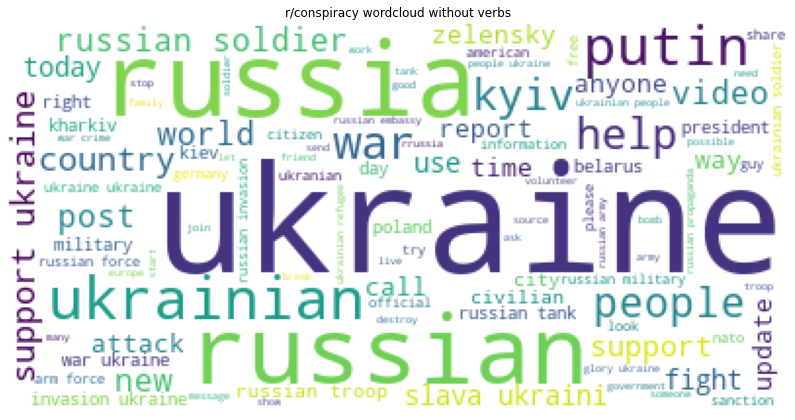

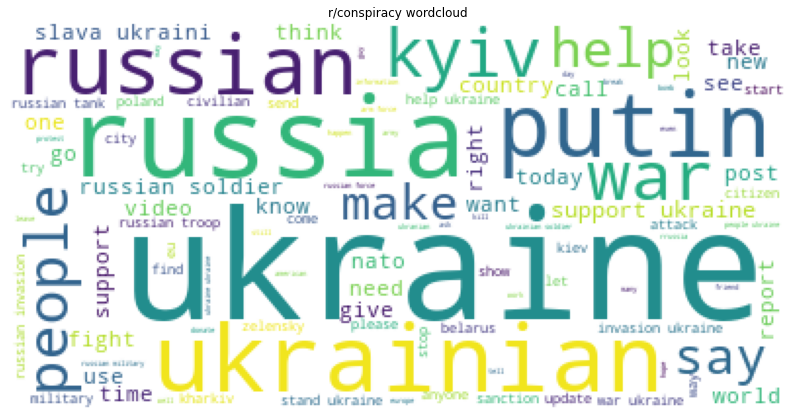

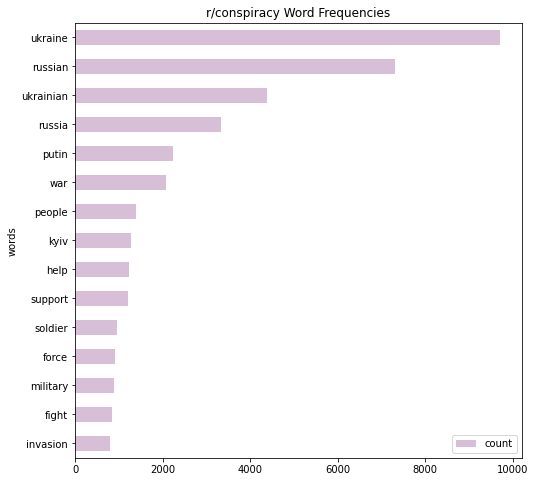

In [9]:
wordcloud_text = ''
wordcloud_all = ''
frequency = []
textfile = open(f'./data/{subreddit}_{type_of_content}_wordlist.txt', "w")

for comment in preprocessed_comments:
    pos = nltk.pos_tag(comment)
    for word in pos:
        wordcloud_all = wordcloud_all + word[0] + ' '
        textfile.write(word[0] + "\n")
        if word[1] in {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS'}:
            wordcloud_text = wordcloud_text + word[0] + ' '
            frequency.append(word[0])

textfile.close()

wc = WordCloud(max_words=100, background_color='white').generate(wordcloud_text)
plt.figure(figsize = (14, 14))
plt.axis('off')
plt.title(f'r/{subreddit} wordcloud without verbs')
plt.imshow(wc)
plt.savefig(f'./images/words/{subreddit}_{type_of_content}_wordcloud_nouns.png')

wc2 = WordCloud(max_words=100, background_color='white').generate(wordcloud_all)
plt.figure(figsize = (14, 14))
plt.axis('off')
plt.title(f'r/{subreddit} wordcloud')
plt.imshow(wc2)
plt.savefig(f'./images/words/{subreddit}_{type_of_content}_wordcloud.png')

word_frequency = collections.Counter(frequency)

word_frequency = pd.DataFrame(word_frequency.most_common(15), columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))
word_frequency.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color='thistle')
plt.title(f'r/{subreddit} Word Frequencies')
plt.savefig(f'./images/words/{subreddit}_{type_of_content}_wordfrequency.png')

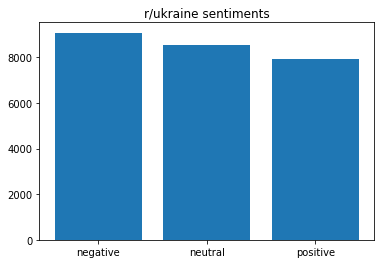

25567

In [23]:
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiments = []
for comment in comments:
    sentiment = sentiment_analyzer.polarity_scores(str(comment))
    if sentiment['compound'] >= 0.05:
        sentiments.append('positive')
    elif sentiment['compound'] <= -0.05:
        sentiments.append('negative')
    else :
        sentiments.append('neutral')

a = dict(Counter(sentiments))

keys = sorted(list(a.keys()))
values = []

for key in keys:
    values.append(a[key])

plt.bar(range(len(a)), values, tick_label=keys)
plt.title(f'r/{subreddit} sentiments')
plt.savefig(f'./images/words/{subreddit}_{type_of_content}_sentiments.png')
plt.show()
len(comments)



In [8]:
#https://www.linkedin.com/pulse/5-methods-do-emotion-analysis-text-data-aeshna-gupta/
import text2emotion
happy = 0
angry = 0
sad = 0
surprise = 0
fear = 0
i = 0
#https://www.researchgate.net/publication/346453096_Sentiment_Analysis_from_Twitter_Data_Regarding_the_COVID-19_Pandemic
for comment in comments:
    i = i+1

    emotions = text2emotion.get_emotion(comment)
    happy = happy + emotions['Happy']
    sad = sad + emotions['Sad']
    angry = angry + emotions['Angry']
    surprise = surprise + emotions['Surprise']
    fear = fear + emotions['Fear']


labels = 'happy', 'sad', 'angry', 'surprise', 'fear'
sizes = [happy/5000, sad/5000, angry/5000, surprise/5000, fear/5000]
plt.bar(labels, sizes)

#fig1, ax1 = plt.subplots()
#ax1.bar(sizes, labels=labels)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

[nltk_data] Downloading package stopwords to /home/irene/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/irene/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/irene/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stop, ngram_range=(2,3), max_features=10000)
# matrix of ngrams
ngrams = c_vec.fit_transform(comments)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})
df_ngram.head(30)

,frequency,bigram/trigram
0,47,russia ukraine
1,40,war ukraine
2,35,nuclear war
3,32,ukraine russia
4,31,invasion ukraine
5,30,ukraine conflict
6,27,ukraine war
7,22,world war
8,20,russian invasion
9,19,world order


In [64]:
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import requests

dict = {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 
'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}
from LeXmo import LeXmo

for comment in comments:
    i = i +1
    emo = LeXmo.LeXmo(comment)
    for key in emo.keys():
        if key != 'text':
            dict[key] = dict[key] + emo[key]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1408\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


dict_values([38.342077472316184, 24.343485538901415, 10.253975387622093, 70.82635449590273, 7.87011911649072, 94.50277155500657, 32.88236286295563, 22.21397221244651, 9.93696876036248, 26.401041415352704])


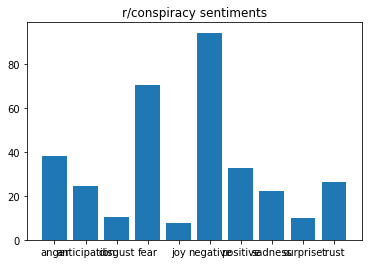

In [65]:
keys = dict.keys()
values = dict.values()
print(values)

plt.bar(keys, values)
plt.title(f'r/{subreddit} sentiments')
plt.savefig(f'./images/words/{subreddit}_filtered_lexmo.png')
plt.show()